Final Project - Data Science for Psychologists - FS2021 - Ursina Möckli - 15-739-659

# World happiness report

## Background

To study happiness in global context is a complex task, particularly because the word ‘Happiness’ is English and translations to other languages or cultures may not always mean the same. Generally, happiness refers to a subjective state of being happy, glad, satisfied or content. This subjective state can be a good measure of what is important in life (Griffin, 2007).


The world happiness report is based on data from Gallup World Poll which measures global happiness, using national representative samples. For this purpose, in the poll, the participants where asked where they would rank their own life, if they think of the best possible for them being a 10 and the worst possible life being a 0. In the year 2012, the first World Happiness report was published, supported by the United Nations. Since 2012, every year (except 2014) a World Happiness report has been published. 

The aim of the World Happiness Report is, for the participaiting nations, to have an estimation of the Happiness in their population and therefore to adapt policy. According to the World Happiness Report, happiness is considered to be more and more a measure of social progress and a goal of public policy. 
There are several reasons why the awareness of happiness worldwide is increasing. First of all, there is an augmented understanding that Happiness can be a good measure of progress for a nation, instead of using only economical measures of growth. Second the measurement of happiness made progress and can nowadays be measured in a more accurate way. Third the social wellbeing in a society has grown of importance in the last years (Helliwell et al., 2016).

The data analyzed in this final project, includes the World Happiness Report from 2015 until 2021. The data sets are obtained from Kaggle (https://www.kaggle.com/unsdsn/world-happiness). 


## Variables

### Geographical Variables
- **'Country'**: represents the observations, it indicates the countries participating the data collection for the World Happiness Report. The number of countires participating every year varies slightly (2015: 158 countries, 2016: 157 countries, 2018: 155 countries, 2019: 156 countries, 2020: 153 countries, 2021: 149 countries).
- **'Region'**: is related to the country and indicates the region of the world the country belongs to ('North America and ANZ (Australia and New Zealand)', 'Central and Eastern Europe', 'East Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeast Asia','South Asia', 'Sub-Saharan Africa', 'Western Europe')

### Happiness Variables:
- **'Score'**: a metric measure representing the happiness of a country. The best possible score being a 10 and the worst possible score being a 0.
- **'Rank'**: describes a country's rank on a worldscale obtained in the according year. The rank is determined by the happiness score, the higher the score, the lower the rank.
- **'Year'**: indicates the year the report was published.

### Influence on Happiness Variables:
The following 6 variables are according to the World Happiness Report the variables with the most influence on happiness. 

- **1. GDP_per_Capita:** represents the extend to which the economical situation contributes to the caluculation of the Happiness Score.
- **2. Social_support:** represents the extend to which the familiy or the social environment contributes to the calculation of the Happiness Score.
- **3. Health:** represents the extend to which life expectancy and healthcare availability contributes to the Happiness Score.
- **4. Freedom:** represents the extend to which the perception of Freedom contributes to the Hapiness Score.
- **5. Trust:** represents the extend to which perception of absence of corruption contributes to the Happiness Score.
- **6. Generosity:** represents the extend to which perception of generosity contributes to the Happiness Score.
- **7. Residual:** represents the part of the score that can not be explained by the 6 variables above.

## Research questions

- Has global happiness changed in the last 7 years? If so, in which direction has global happiness changed?
- Are there differences between the regions in terms of global happiness? In which region are the people happiest?
- Which of the 6 predictors has the strongest impact on happiness in the year 2021?


## Data Plan Organization

1. Data cleaning 1: 
    - import the data
    - remove variables that are not included in all the data sets 
    - rename observations in the variable 'Country' that have different names in the data sets according to the most actual data set (2021)
    - add new variables 'Year' and 'Region' that are necessary, but not not existing in all the data sets
    - replace missing values in the new variable 'Region'
2. Organizing the data in a tidy format:
    - rename variables in order to have uniform variable-names in all the data sets
    - merge the 7 data sets into 1 big data set
3. Data cleaning 2:
    - remove missing observations
    - create a new variable 'Residuals' that was not existing in all the data sets
    - rename observations in the variable 'Region' in order to have uniform names
    - create a subset for the year 2021 to analyze research question 3
4. Table and structure of the cleaned and merged data
5. Exploration and visualization of the data:
    - Boxplots
    - Densityplots
    - Scatterplots
5. Statistical analysis: 
    - Descriptive analysis
    - Analysis of variance
    - Post-hoc Test
    - Bootstrapping (Rank of the regions)
6. Statistical analysis for the year 2021:
    - Correlation
    - Multiple linear regression (Model 1 & Model 2)
    - Model selection with AIC
    - Model selection with Crossvalidation

## 1. Data cleaning

In [1]:
# import the data sets for each year
data_2015 <- read.csv('data/2015.csv')
data_2016 <- read.csv('data/2016.csv')
data_2017 <- read.csv('data/2017.csv')
data_2018 <- read.csv('data/2018.csv')
data_2019 <- read.csv('data/2019.csv')
data_2020 <- read.csv('data/2020.csv')
data_2021 <- read.csv('data/world-happiness-report-2021.csv')

#to get an overview, I checked the structure and the names of the data sets
#str(data_2015)
#str(data_2016)
#str(data_2017)
#str(data_2018)
#str(data_2019)
#str(data_2020)
#str(data_2021)

# remove variables that are not included in all the data sets
data_2015$Standard.Error = NULL
data_2015$Dystopia.Residual = NULL
data_2016$Lower.Confidence.Interval = NULL
data_2016$Upper.Confidence.Interval = NULL
data_2016$Dystopia.Residual = NULL
data_2017$Whisker.high = NULL
data_2017$Whisker.low = NULL
data_2017$Dystopia.Residual = NULL
data_2018$Residual = NULL
data_2020$Standard.error.of.ladder.score = NULL
data_2020$upperwhisker = NULL
data_2020$lowerwhisker = NULL
data_2020$Logged.GDP.per.capita = NULL
data_2020$Social.support = NULL
data_2020$Healthy.life.expectancy = NULL
data_2020$Freedom.to.make.life.choices = NULL
data_2020$Generosity = NULL
data_2020$Perceptions.of.corruption = NULL
data_2020$Ladder.score.in.Dystopia = NULL
data_2020$Dystopia...residual = NULL
data_2021$Standard.error.of.ladder.score = NULL
data_2021$upperwhisker = NULL
data_2021$lowerwhisker = NULL
data_2021$Logged.GDP.per.capita = NULL
data_2021$Social.support = NULL
data_2021$Healthy.life.expectancy = NULL
data_2021$Freedom.to.make.life.choices = NULL
data_2021$Generosity = NULL
data_2021$Perceptions.of.corruption = NULL
data_2021$Dystopia...residual =NULL
data_2021$Ladder.score.in.Dystopia = NULL


# add the year as a new variable
data_2015$Year <- 2015
data_2016$Year <- 2016
data_2017$Year <- 2017
data_2018$Year <- 2018
data_2019$Year <- 2019
data_2020$Year <- 2020
data_2021$Year <- 2021

# define country as character and rename countries according to the most actual data
data_2015$Country <- as.character(data_2015$Country)
data_2016$Country <- as.character(data_2016$Country)
data_2017$Country <- as.character(data_2017$Country)
data_2018$Country.or.region <- as.character(data_2018$Country.or.region)
data_2019$Country.or.region <- as.character(data_2019$Country.or.region)
data_2015$Country[38] <- 'Taiwan Province of China'
data_2015$Country[72] <- 'Hong Kong S.A.R. of China'
data_2015$Country[91] <- 'Somalia'
data_2017$Country[71] <- 'Hong Kong S.A.R. of China'
data_2018$Country.or.region[26] <- 'Taiwan Province of China'
data_2018$Country.or.region[76] <- 'Hong Kong S.A.R. of China'
data_2019$Country.or.region[25] <- 'Taiwan Province of China'
data_2019$Country.or.region[76] <- 'Hong Kong S.A.R. of China'


# add 'Region' as a new column in the data sets 2017 - 2019
regions <- data_2015[,1:2]
data_2017$Region<-regions$Region[match(data_2017$Country, regions$Country)]
data_2018$Region<-regions$Region[match(data_2018$Country.or.region, regions$Country)]
data_2019$Region<-regions$Region[match(data_2019$Country.or.region, regions$Country)]

# add 'Rank' as a new column  in the data 2020 - 2021
data_2020$Rank <- (1:153)
data_2021$Rank <- (1:149)

# replace the missing values in the new variable 'region' in the data sets 2017 - 2019
#levels(data_2017$Region)
missingCases17 <- which(is.na(data_2017$Region)==TRUE); #head(missingCases17)
#show(data_2017[50 ,]) # instead of copying this code for each missing value, I altered the number
data_2017$Region[50] <- 'Latin America and Caribbean'
data_2017$Region[111] <- 'Sub-Saharan Africa'
data_2017$Region[147] <- 'Sub-Saharan Africa'

missingCases18 <- which(is.na(data_2018$Region)==TRUE); #head(missingCases18)
#show(data_2018[38 ,]) # instead of copying this code for each missing value, I altered the number
data_2018$Region[38] <- 'Latin America and Caribbean'
data_2018$Region[49] <- 'Latin America and Caribbean'
data_2018$Region[58] <- "Central and Eastern Europe" 
data_2018$Region[119] <- 'Sub-Saharan Africa'
data_2018$Region[154] <- 'Sub-Saharan Africa'


missingCases19 <- which(is.na(data_2019$Region)==TRUE); #head(missingCases19)
#show(data_2019[39,]) # instead of copying this code for each missing value, I altered the number
data_2019$Region[39] <- 'Latin America and Caribbean'
data_2019$Region[64] <- "Central and Eastern Europe" 
data_2019$Region[84] <- "Central and Eastern Europe"
data_2019$Region[113] <- 'Sub-Saharan Africa'
data_2019$Region[120] <- 'Sub-Saharan Africa'
data_2019$Region[156] <- 'Sub-Saharan Africa'



## 2. Organizing the data in a tidy format

In [2]:
#rename to columns in order to have uniform columnnames in the data sets
#colnames(data_2015)
#colnames(data_2016)
#colnames(data_2017)
#colnames(data_2018)
#colnames(data_2019)
#colnames(data_2020)
#colnames(data_2021)

#install.packages('tidyverse')
library(tidyverse, quietly = TRUE) # for the pipe
data_2015 <- data_2015 %>% rename(Rank = Happiness.Rank, Score = Happiness.Score,  GDP_per_Capita = Economy..GDP.per.Capita., Health = Health..Life.Expectancy., Trust = Trust..Government.Corruption., Social_support = Family)
data_2016 <- data_2016 %>% rename(Rank = Happiness.Rank, Score = Happiness.Score,  GDP_per_Capita = Economy..GDP.per.Capita., Health = Health..Life.Expectancy., Trust = Trust..Government.Corruption., Social_support = Family)
data_2017 <- data_2017 %>% rename(Rank = Happiness.Rank, Score = Happiness.Score,  GDP_per_Capita = Economy..GDP.per.Capita., Health = Health..Life.Expectancy., Trust = Trust..Government.Corruption., Social_support = Family)
data_2018 <- data_2018 %>% rename(Rank = Overall.rank, Country = Country.or.region, Health = Healthy.life.expectancy, Freedom = Freedom.to.make.life.choices, Trust= Perceptions.of.corruption, Social_support = Social.support, GDP_per_Capita = GDP.per.capita)
data_2019 <- data_2019 %>% rename(Country = Country.or.region, Rank = Overall.rank, Social_support = Social.support, Health = Healthy.life.expectancy, Freedom = Freedom.to.make.life.choices, Trust = Perceptions.of.corruption, GDP_per_Capita = GDP.per.capita)
data_2020 <- data_2020 %>% rename(Country = Country.name, Region = Regional.indicator, Score = Ladder.score, GDP_per_Capita = Explained.by..Log.GDP.per.capita, Social_support = Explained.by..Social.support, Health = Explained.by..Healthy.life.expectancy, Freedom = Explained.by..Freedom.to.make.life.choices, Generosity = Explained.by..Generosity, Trust = Explained.by..Perceptions.of.corruption)
data_2021 <- data_2021 %>% rename(Country = Country.name, Region = Regional.indicator, Score = Ladder.score, GDP_per_Capita = Explained.by..Log.GDP.per.capita, Social_support = Explained.by..Social.support, Health = Explained.by..Healthy.life.expectancy, Freedom = Explained.by..Freedom.to.make.life.choices, Generosity = Explained.by..Generosity, Trust = Explained.by..Perceptions.of.corruption)

#str(data_2015)
#str(data_2016)
#str(data_2017)
#str(data_2018)
#str(data_2019)
#str(data_2020)
#str(data_2021)

# merge the data to one data set
full_data <-rbind(data_2015, data_2016,data_2017, data_2018, data_2019, data_2020, data_2021)

# arrange the data according to the year
full_data <- arrange(full_data, Year)



Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 3. Data cleaning 2 in  the merged data set

In [3]:
# convert variables in order to make calculations
full_data$Year <- as.factor(full_data$Year)
full_data$Trust <- as.numeric(full_data$Trust)

# check for missing values
#full_data[!complete.cases(full_data),]

# exclude the observation with missing value
full_data <- na.omit(full_data)

# create a new variable 'Residual' to calculate part of the score that is unexplained by the 6 variables
attach(full_data)
full_data$Residual <- (Score - (GDP_per_Capita+Social_support+Health+Freedom+Trust+Generosity))
detach(full_data)


# adapt the variable Region to make them uniform in the data set
# levels(full_data$Region)

levels(full_data$Region) <- sub('Eastern Asia', 'East Asia', levels(full_data$Region))
levels(full_data$Region) <- sub('Southern Asia', 'South Asia', levels(full_data$Region))
levels(full_data$Region) <- sub('Southeastern Asia', 'Southeast Asia', levels(full_data$Region))
levels(full_data$Region) <- sub('Australia and New Zealand', 'North America', levels(full_data$Region))
levels(full_data$Region) <- sub('North America and ANZ', 'North America', levels(full_data$Region))
levels(full_data$Region) <- sub('North America', 'North America and ANZ', levels(full_data$Region))
levels(full_data$Region) <- sub('Middle East and North Africa', 'Middle East and Northern Africa', levels(full_data$Region))

#compare the subsets "Central and Eastern Europe" and "Commonwealth of Independent States"
c_w <- subset(full_data, Region == "Commonwealth of Independent States")
easter_e <- subset(full_data, Region == "Central and Eastern Europe")
# replace Region'Commonwealth of Independent States', 'Central and Eastern Europe'
levels(full_data$Region) <- sub('Commonwealth of Independent States', 'Central and Eastern Europe', levels(full_data$Region))

#levels(full_data$Region)

#create a subset fpr the year 2021
data_21 <- subset(full_data, Year == 2021)

Warning message in eval(expr, envir, enclos):
“NAs durch Umwandlung erzeugt”


## 4. Table of the cleaned and merged data

In [4]:
head(full_data)
str(full_data)

head(data_21)
str(data_21)

,Country,Region,Rank,Score,GDP_per_Capita,Social_support,Health,Freedom,Trust,Generosity,Year,Residual
,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2.51742
2,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,2.70209
3,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,2.49196
4,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,2.46509
5,Canada,North America and ANZ,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,2.45182
6,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,2.61946


'data.frame':	1083 obs. of  12 variables:
 $ Country       : chr  "Switzerland" "Iceland" "Denmark" "Norway" ...
 $ Region        : Factor w/ 9 levels "North America and ANZ",..: 9 9 9 9 1 9 9 9 1 1 ...
 $ Rank          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Score         : num  7.59 7.56 7.53 7.52 7.43 ...
 $ GDP_per_Capita: num  1.4 1.3 1.33 1.46 1.33 ...
 $ Social_support: num  1.35 1.4 1.36 1.33 1.32 ...
 $ Health        : num  0.941 0.948 0.875 0.885 0.906 ...
 $ Freedom       : num  0.666 0.629 0.649 0.67 0.633 ...
 $ Trust         : num  0.42 0.141 0.484 0.365 0.33 ...
 $ Generosity    : num  0.297 0.436 0.341 0.347 0.458 ...
 $ Year          : Factor w/ 7 levels "2015","2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Residual      : num  2.52 2.7 2.49 2.47 2.45 ...
 - attr(*, "na.action")= 'omit' Named int 490
  ..- attr(*, "names")= chr "490"


,Country,Region,Rank,Score,GDP_per_Capita,Social_support,Health,Freedom,Trust,Generosity,Year,Residual
,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
936,Finland,Western Europe,1,7.842,1.446,1.106,0.741,0.691,0.481,0.124,2021,3.253
937,Denmark,Western Europe,2,7.620,1.502,1.108,0.763,0.686,0.485,0.208,2021,2.868
938,Switzerland,Western Europe,3,7.571,1.566,1.079,0.816,0.653,0.413,0.204,2021,2.840
939,Iceland,Western Europe,4,7.554,1.482,1.172,0.772,0.698,0.170,0.293,2021,2.967
940,Netherlands,Western Europe,5,7.464,1.501,1.079,0.753,0.647,0.384,0.302,2021,2.798
941,Norway,Western Europe,6,7.392,1.543,1.108,0.782,0.703,0.427,0.249,2021,2.580


'data.frame':	149 obs. of  12 variables:
 $ Country       : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Region        : Factor w/ 9 levels "North America and ANZ",..: 9 9 9 9 9 9 9 9 1 9 ...
 $ Rank          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Score         : num  7.84 7.62 7.57 7.55 7.46 ...
 $ GDP_per_Capita: num  1.45 1.5 1.57 1.48 1.5 ...
 $ Social_support: num  1.11 1.11 1.08 1.17 1.08 ...
 $ Health        : num  0.741 0.763 0.816 0.772 0.753 0.782 0.763 0.76 0.785 0.782 ...
 $ Freedom       : num  0.691 0.686 0.653 0.698 0.647 0.703 0.685 0.639 0.665 0.64 ...
 $ Trust         : num  0.481 0.485 0.413 0.17 0.384 0.427 0.448 0.353 0.445 0.292 ...
 $ Generosity    : num  0.124 0.208 0.204 0.293 0.302 0.249 0.244 0.166 0.276 0.215 ...
 $ Year          : Factor w/ 7 levels "2015","2016",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Residual      : num  3.25 2.87 2.84 2.97 2.8 ...


## 5. Exploartion and visualization of the data

### Boxplots


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




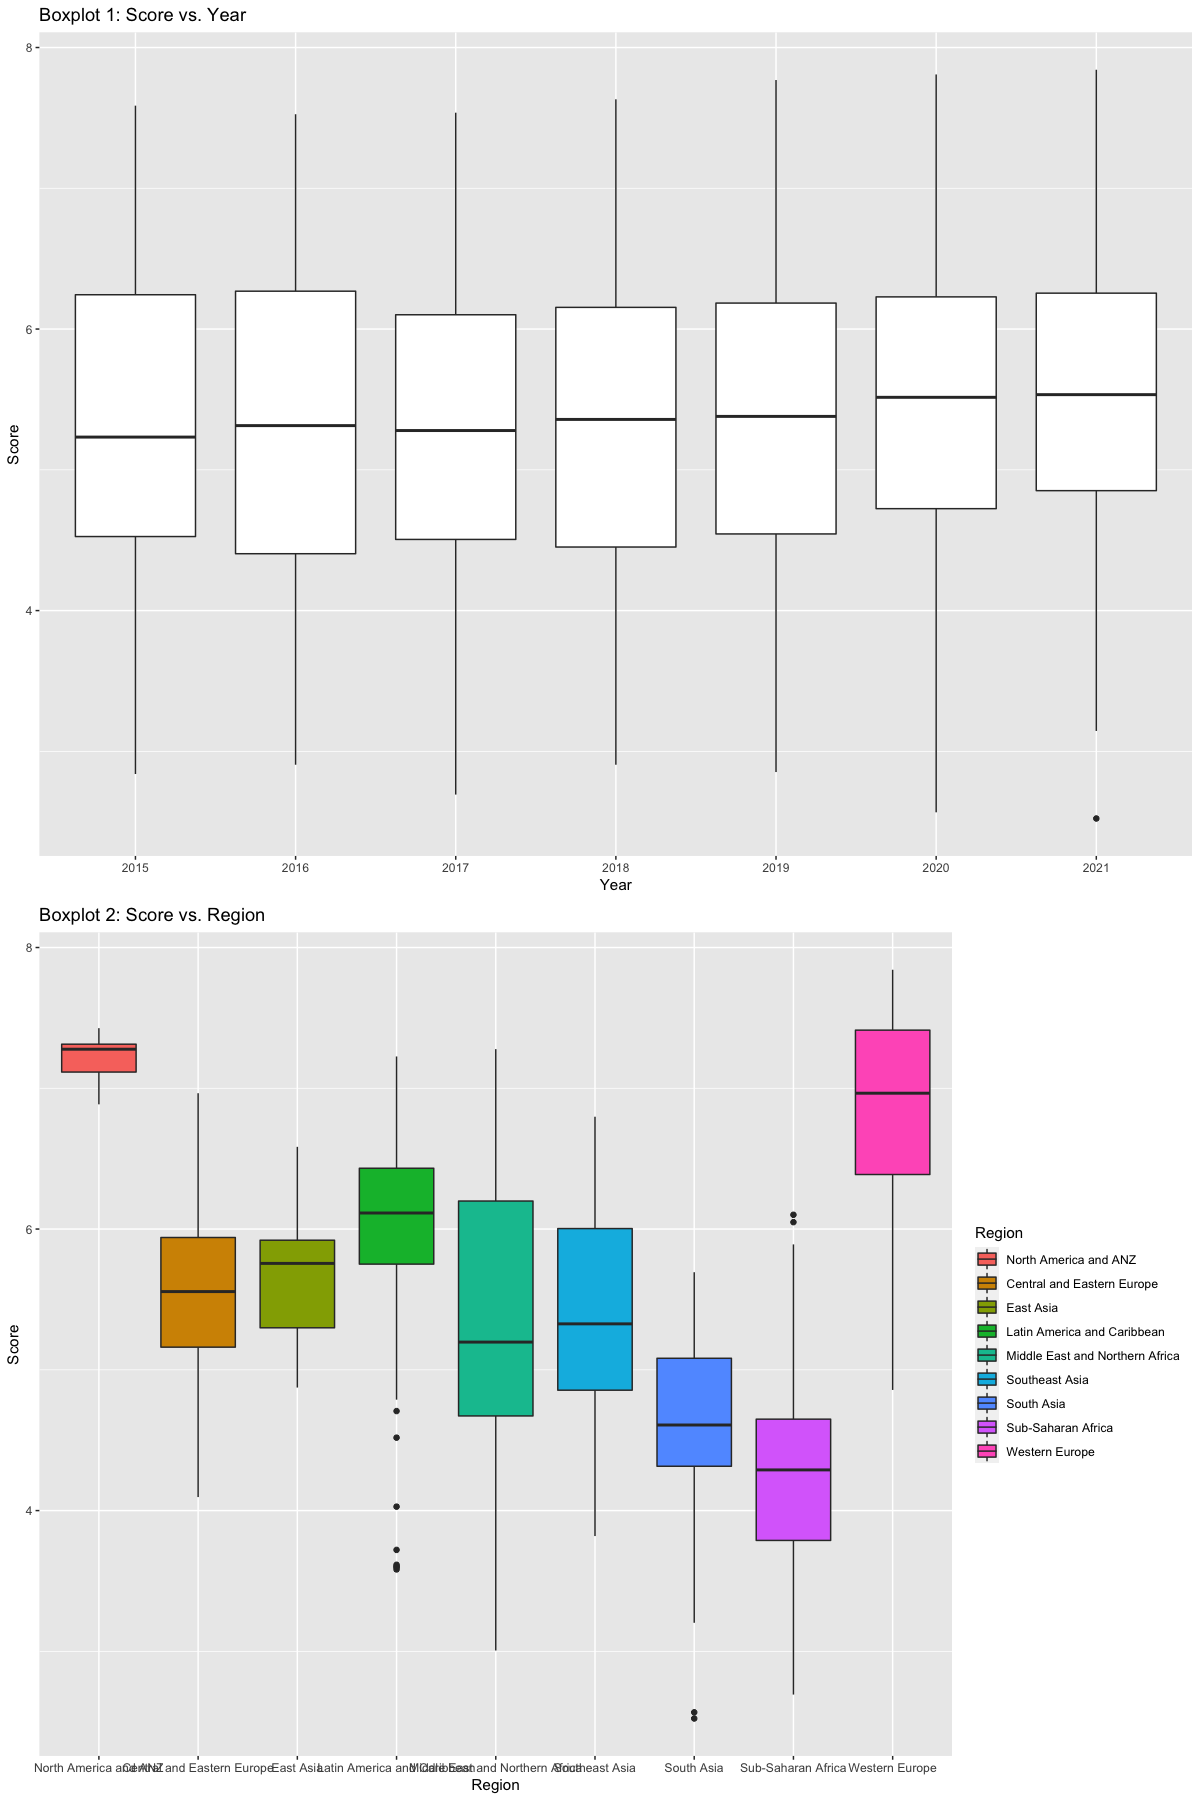

In [5]:
library(ggplot2, quietly = TRUE)
library(gridExtra, quietly = TRUE)

options(repr.plot.width = 12, repr.plot.height = 18, repr.plot.res = 100)

b1 <- ggplot(full_data, aes(x=Year, y=Score)) + geom_boxplot() + ggtitle('Boxplot 1: Score vs. Year')
b2 <- ggplot(full_data, aes(x = Region, y = Score, fill = Region)) + geom_boxplot() + ggtitle('Boxplot 2: Score vs. Region') 

grid.arrange(b1, b2)
 

- Boxplot 1 shows a very slight increase in happiness between 2018 and 2021, before 2018 the overall world happiness seems to be stable. Furthermore, the variance of the Happiness Score over the years seem to vary very slightly. In the year 2021 an outlier is visible.
- Boxplot 2 shows that there is variability of the median between the regions. According to the boxplot the happiest people live in 'North America and ANZ' followed by 'Western Europe'. The lowest happines score shows the region 'Sub-Saharan Africa'. Furthermore, the data subdivided by region shows more variability in variance and skewedness. More outliers are visible, especially in the region 'Latin America and the Carribean'.

Overall, the boxplots show that the world happiness seems to be stable over the years, but vary quiet a lot over the regions.


### Density plots

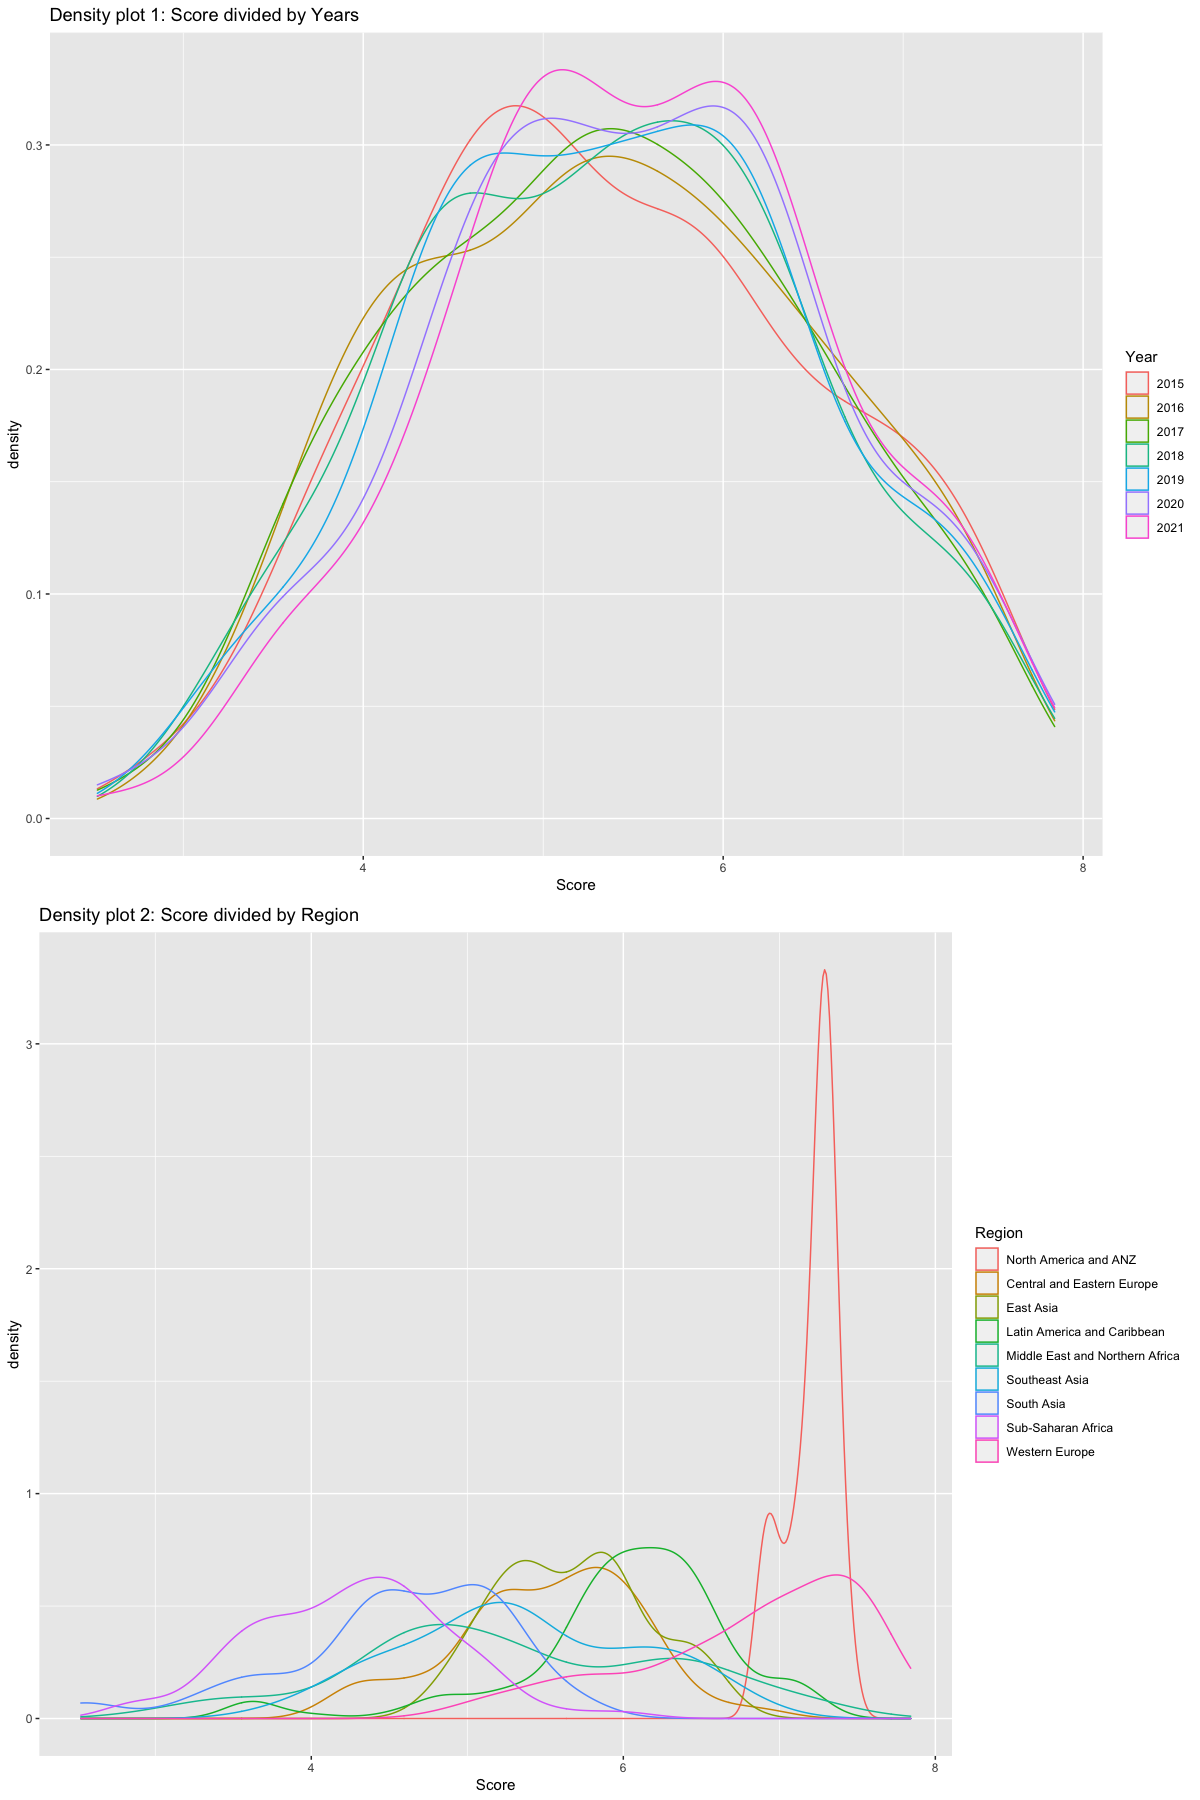

In [6]:
d1 <- ggplot(full_data, aes(Score, color= Year)) + geom_density() + ggtitle('Density plot 1: Score divided by Years') 
d2 <- ggplot(full_data, aes(Score, color= Region)) + geom_density() + ggtitle('Density plot 2: Score divided by Region')

grid.arrange(d1, d2)



- Density plot 1: Similar to the Boxplot 1, the Densityplot shows similar distributions of the Score over the years. The distribution seems to be close to a normal distribution with a bimodal tendency, especially in the years 2020 and 2021.
- Density plot 2: Here a big variety in the distribution is visible. The data per region seems not to be normally distributed. 'North America and ANZ' peaks out in this plot, this means that countries in that region have similar Scores.

Overall, the density plots show that normal distribution can not be assumed, especially if the data is divided by region.

### Scatterplots

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



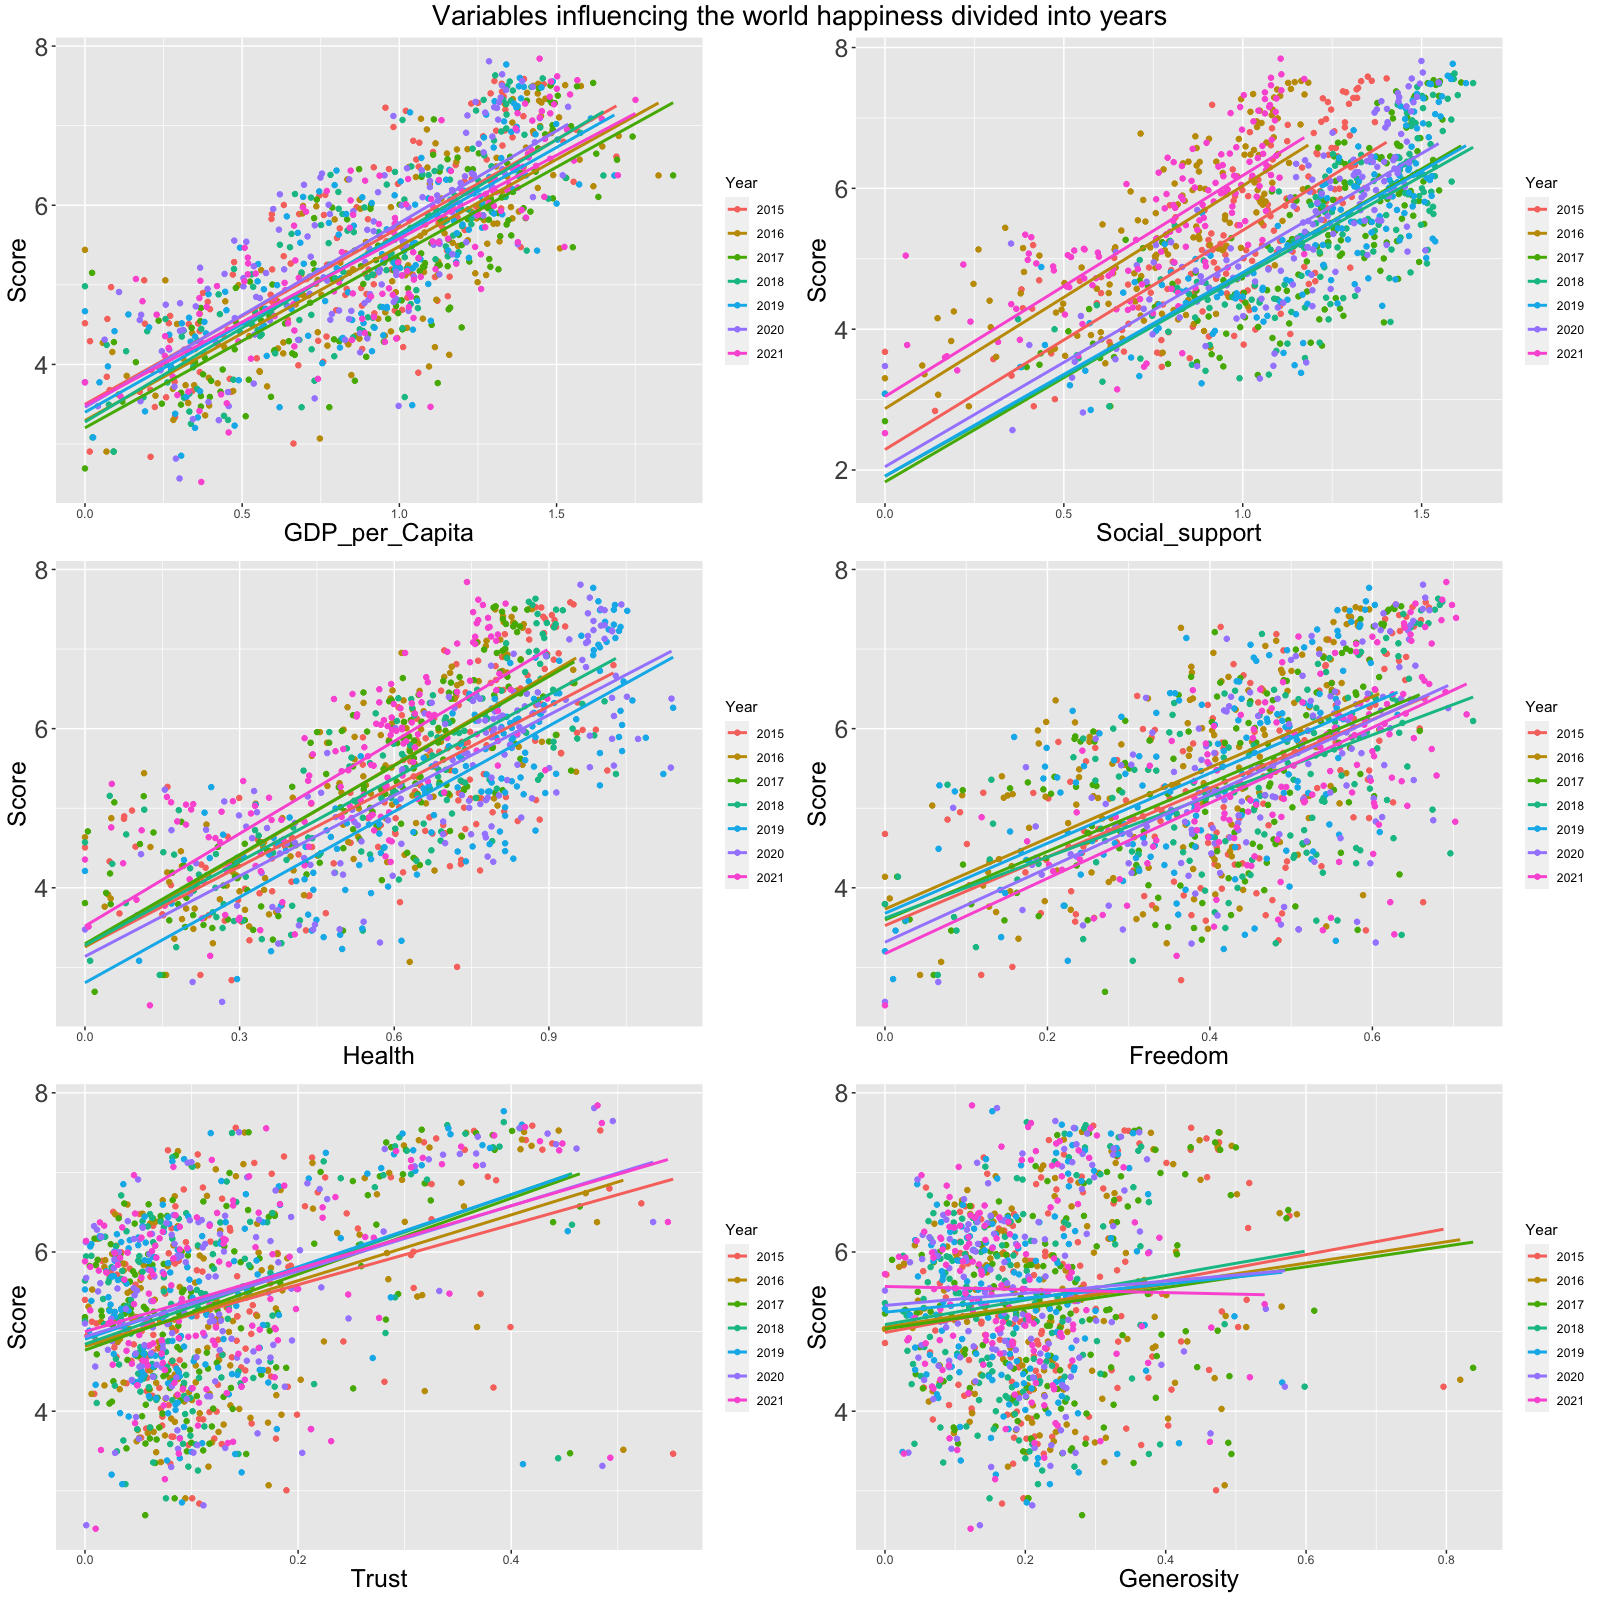

In [12]:
library(repr, quietly = TRUE)
library(grid, quietly = TRUE)

options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

sy1 <- ggplot(full_data, aes(x= GDP_per_Capita, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 22)) + theme(legend.text = element_text(size = 22))) 
sy2 <- ggplot(full_data, aes(x= Social_support, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))
sy3 <- ggplot(full_data, aes(x= Health, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))
sy4 <- ggplot(full_data, aes(x= Freedom, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))
sy5 <- ggplot(full_data, aes(x= Trust, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))
sy5 <- ggplot(full_data, aes(x= Trust, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))
sy6 <- ggplot(full_data, aes(x= Generosity, y=Score, color= Year))+ geom_point() + geom_smooth(method=lm, se = FALSE)+ theme(axis.title.y = element_text(size =18)) + theme(axis.text.y = element_text(size =18)) + theme(axis.title.x = element_text(size =18)) + theme(axis.text.x = element_text(size =18) + theme(legend.title = element_text(size = 18)) + theme(legend.text = element_text(size = 18)))

grid.arrange(sy1, sy2, sy3, sy4, sy5, sy6, ncol = 2, nrow =3 , top = textGrob('Variables influencing the world happiness divided into years', gp=gpar(fontsize=20, font=12)))


This scatterplots represent the relationships between the 6 predictor variables and the happiness score while the years are represented in different colors. Social support shows some variance between the years, whereat in the years 2016 and 2021 social support seems to have a grater impact on the happiness score. Furthermore, Health seems to have the greatest impact on happiness score in the year 2021 compard to the other years. Eye-cathcing is the year 2021 in the plot 'Generosity vs. Score', Generosity compared to the other years seems not to have any or even a negative relationship with the happiness score. In the statistical analysis, a focus will be set on the year 2021.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



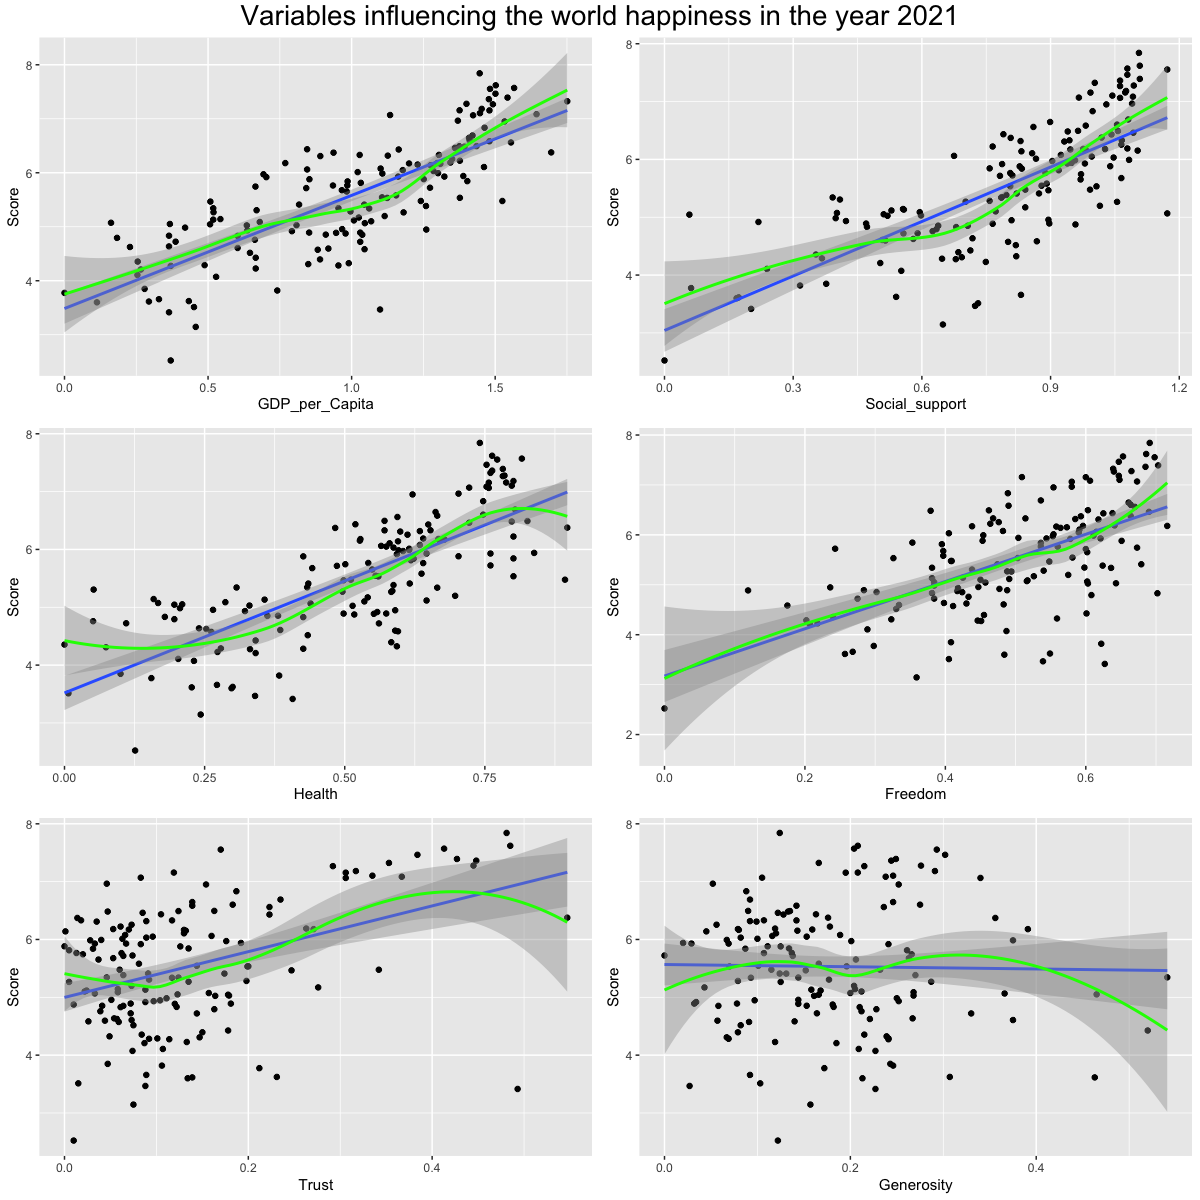

In [9]:
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 100)
s1 <- ggplot(data_21, aes(x= GDP_per_Capita, y=Score))+ geom_point() + geom_smooth(method=lm) + geom_smooth(color = 'green')
s2 <- ggplot(data_21, aes(x= Social_support, y=Score))+ geom_point() + geom_smooth(method=lm) + geom_smooth(color = 'green')
s3 <- ggplot(data_21, aes(x= Health, y=Score))+ geom_point() + geom_smooth(method=lm) + geom_smooth(color = 'green')
s4 <- ggplot(data_21, aes(x= Freedom, y=Score))+ geom_point()+ geom_smooth(method=lm)+ geom_smooth(color = 'green') 
s5 <- ggplot(data_21, aes(x= Trust, y=Score))+ geom_point() + geom_smooth(method=lm) + geom_smooth(color = 'green')
s6 <- ggplot(data_21, aes(x= Generosity, y=Score))+ geom_point() + geom_smooth(method=lm) + geom_smooth(color = 'green')

grid.arrange(s1, s2, s3, s4, s5, s6, nrow = 3, top = textGrob('Variables influencing the world happiness in the year 2021', gp=gpar(fontsize=20, font=12)))


The Scatterplots represent the relationships between the 6 predictor variables and the happiness score in the year 2021. GDP_per_Capita, Social_support, Health, Freedom and Trust seem to be close to a positive linear pattern. Generosity seems not to be correlated with the happiness score

According to these plots show that GDP_per_Capita, Social_support, Health, Freedom and Trust can probably be used as linear predictors.  Health and Trust might be better predictors if transformed and Generosity seems not to be a good predictor for the world happiness.


## Statistical analysis

### Descriptive Analysis

In [10]:
library(psych, quietly = TRUE)

describe(full_data)


Warning message:
“package ‘psych’ was built under R version 3.6.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Country*,1,1083,84.0036934,49.1125117,83.0000000,83.5813149,62.2692000,1.000,170.0000000,169.0000000,0.060511281,-1.17398185,1.492374834
Region*,2,1083,5.5447830,2.5989793,5.0000000,5.5882353,4.4478000,1.000,9.0000000,8.0000000,-0.151683793,-1.42776997,0.078974809
Rank,3,1083,78.0036934,44.7521825,78.0000000,77.9919262,57.8214000,1.000,158.0000000,157.0000000,0.001713634,-1.19795516,1.359878139
Score,4,1083,5.4122038,1.1183463,5.3843002,5.4108321,1.2078739,2.523,7.8420000,5.3190000,-0.003708429,-0.68875779,0.033983028
GDP_per_Capita,5,1083,0.9166871,0.4014989,0.9820187,0.9330847,0.4448077,0.000,1.8707657,1.8707657,-0.338956859,-0.75839097,0.012200289
Social_support,6,1083,1.0503590,0.3320850,1.0826800,1.0745374,0.3479366,0.000,1.6440000,1.6440000,-0.617058261,0.03319156,0.010091019
Health,7,1083,0.6110360,0.2487247,0.6436800,0.6235883,0.2521158,0.000,1.1410000,1.1410000,-0.439536740,-0.52458557,0.007557961
Freedom,8,1083,0.4306789,0.1527050,0.4490000,0.4409709,0.1571556,0.000,0.7240000,0.7240000,-0.566328689,-0.19994737,0.004640224
Trust,9,1083,0.1275171,0.1080289,0.0930000,0.1092115,0.0696822,0.000,0.5519100,0.5519100,1.551953627,2.03624026,0.003282658


The mean of the happiness score claculated by the 'describe' function is: 5.4122
The standard error of the happiness score claculated by the 'describe' function is: 0.0339

In a next step the mean of the happiness score and the 95% confidence interval will be calculated with bootstrapping.

In [11]:
library(boot, quietly = TRUE)
set.seed(5)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score, alpha.fn, R=1000)

# calculate the 95% confidence interval for the mean of the happiness score

KI_Score <- c( 5.412204-(2*0.03355469), 5.412204 +(2*0.03355469)); KI_Score


Attaching package: ‘boot’


The following object is masked from ‘package:psych’:

    logit





ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 5.412204 0.0002311931  0.03355469

[1] 5.345095 5.479313

### Analysis of variance 

With the analysis of variance, the research question 1 and 2 should be answered. The 'aov1' tests, whether year and region have a significant impact on the happinesss score. The interaction.model tests, wether there is an interaction between the influence of year and region.

In [12]:
aov1 = aov(Score ~ Year + Region, data = full_data)
model1.anova = anova(aov1)
print(model1.anova)

Analysis of Variance Table

Response: Score
            Df Sum Sq Mean Sq F value Pr(>F)    
Year         6   3.94   0.656   1.344 0.2345    
Region       8 827.91 103.489 211.976 <2e-16 ***
Residuals 1068 521.41   0.488                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


According to the aov1, the year has no significant impact on the happiness score. On the other hand regions has a significant impact on th happiness score (p <2e-16 ***)

In [13]:
interaction.model = aov(Score ~ Year * Region, data = full_data)
interaction.anova = anova(interaction.model)
print(interaction.anova)

Analysis of Variance Table

Response: Score
              Df Sum Sq Mean Sq  F value Pr(>F)    
Year           6   3.94   0.656   1.3073 0.2509    
Region         8 827.91 103.489 206.1905 <2e-16 ***
Year:Region   48   9.46   0.197   0.3927 0.9999    
Residuals   1020 511.95   0.502                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


According to the interaction.model, there is no significant interaction between year and region.

The first research question (Has global happiness changed in the last 7 years? If so, in which direction has global happiness changed?) can be be answered by the results of these models.
**The Hypothesis that there is no significant differnce between the years (2015 - 2021) can be accepted. So, we can assume that there is no significant difference between the years.**

The first part of the second research question (Are there differences between the regions in terms of global happiness? In which region are the people happiest?) can be aswered by the results of these models.
**The Hypothesis that there is no significant differnces between the regions can be refused. So, we can assume that there is a significant difference between the regions.**

These results are consistent with the visual analysis (Boxplot 1 and Boyplot 2).

### Post-hoc test

To answer the second part of the research question 2 a post-hoc test is needed.

In [23]:
library(rstatix)

res.post.hoc <- full_data %>% tukey_hsd(Score ~ Region)
res.post.hoc

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Region,North America and ANZ,Central and Eastern Europe,0,-1.69731455,-2.13507312,-1.259555970,6.02e-13,****
2,Region,North America and ANZ,East Asia,0,-1.52746549,-2.05756574,-0.997365242,6.79e-13,****
3,Region,North America and ANZ,Latin America and Caribbean,0,-1.20798054,-1.65481648,-0.761144609,6.98e-13,****
4,Region,North America and ANZ,Middle East and Northern Africa,0,-1.91466287,-2.36765286,-1.461672882,6.02e-13,****
5,Region,North America and ANZ,Southeast Asia,0,-1.85803905,-2.35275857,-1.363319534,6.04e-13,****
6,Region,North America and ANZ,South Asia,0,-2.66495562,-3.17968737,-2.150223875,6.02e-13,****
7,Region,North America and ANZ,Sub-Saharan Africa,0,-2.95235025,-3.38365534,-2.521045161,6.02e-13,****
8,Region,North America and ANZ,Western Europe,0,-0.40864598,-0.85715655,0.039864588,1.07e-01,ns
9,Region,Central and Eastern Europe,East Asia,0,0.16984906,-0.19816088,0.537858997,8.84e-01,ns


Most of the regions (36 possible combinations) show a significant difference in the happiness score. No significant differences are seen between the following regions:

- North America and ANZ AND Western Europe
- Central and Eastern Europe AND East Asia
- Central and Eastern Europe AND Middle East and Northern Africa
- Central and Eastern Europe AND Southeast Asia
- East Asia Latin America and Caribbean
- East Asia AND Southeast Asia
- Middle East and Northern Africa AND Southeast Asia
- South Asia AND Sub-Saharan Africa



### Bootstrapping

To rank the regions by the mean of the happiness score the mean of each region is calculated by bootstrapping, due to the non-normal distribution of the score by region.

In [15]:
library(boot)

set.seed(6)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'North America and ANZ'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Western Europe'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Latin America and Caribbean'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'East Asia'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Central and Eastern Europe'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Southeast Asia'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Middle East and Northern Africa'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'South Asia'], alpha.fn, R=1000)

alpha.fn = function(data, index){mean(data[index])}
boot(full_data$Score[full_data$Region == 'Sub-Saharan Africa'], alpha.fn, R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "North America and ANZ"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 7.210754 -0.001243864  0.02882208


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Western Europe"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 6.802108 -0.001044143  0.06013423


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Latin America and Caribbean"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original        bias    std. error
t1* 6.002773 -0.0009586896  0.05720808


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "East Asia"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 5.683288 0.001957308  0.07183525


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Central and Eastern Europe"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 5.513439 -0.002535417  0.04226972


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Southeast Asia"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 5.352715 -0.0020492  0.09398055


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Middle East and Northern Africa"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 5.296091 -0.002470291  0.08755465


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "South Asia"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 4.545798 -0.003228037   0.1028107


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = full_data$Score[full_data$Region == "Sub-Saharan Africa"], 
    statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 4.258403 0.0005802038  0.03953124

The Second part of the research question 2 can be answered according to the results above. 
**The happiest people live in North America and New Zealand.**

1. North America and ANZ
2. Western Europe
3. Latin America and Caribbean
4. East Asia
5. Central and Eastern Europe
6. Southeast Asia
7. Middle East and Northern Africa
8. South Asia
9. Sub-Saharan Africa


These reuslts are consistent with the visual analysis (Boxplot 2).

## Statistical analysis for the year 2021

### Correlation

,Score,GDP_per_Capita,Social_support,Health,Freedom,Trust,Generosity,Residual
Score,1.00000000,0.78974470,0.756868688,0.76813788,0.6077929,0.421205429,-0.01763104,0.491983109
GDP_per_Capita,0.78974470,1.00000000,0.785163071,0.85947410,0.4324098,0.342304794,-0.19947419,-0.041153995
Social_support,0.75686869,0.78516307,1.000000000,0.72318271,0.4830346,0.203580273,-0.11487682,0.006532439
Health,0.76813788,0.85947410,0.723182706,1.00000000,0.4614448,0.364381425,-0.16187946,-0.023370721
Freedom,0.60779292,0.43240979,0.483034631,0.46144477,1.0000000,0.401077591,0.16940937,0.100386259
Trust,0.42120543,0.34230479,0.203580273,0.36438143,0.4010776,1.000000000,0.16413421,-0.004312178
Generosity,-0.01763104,-0.19947419,-0.114876820,-0.16187946,0.1694094,0.164134206,1.00000000,-0.026746047
Residual,0.49198311,-0.04115399,0.006532439,-0.02337072,0.1003863,-0.004312178,-0.02674605,1.000000000


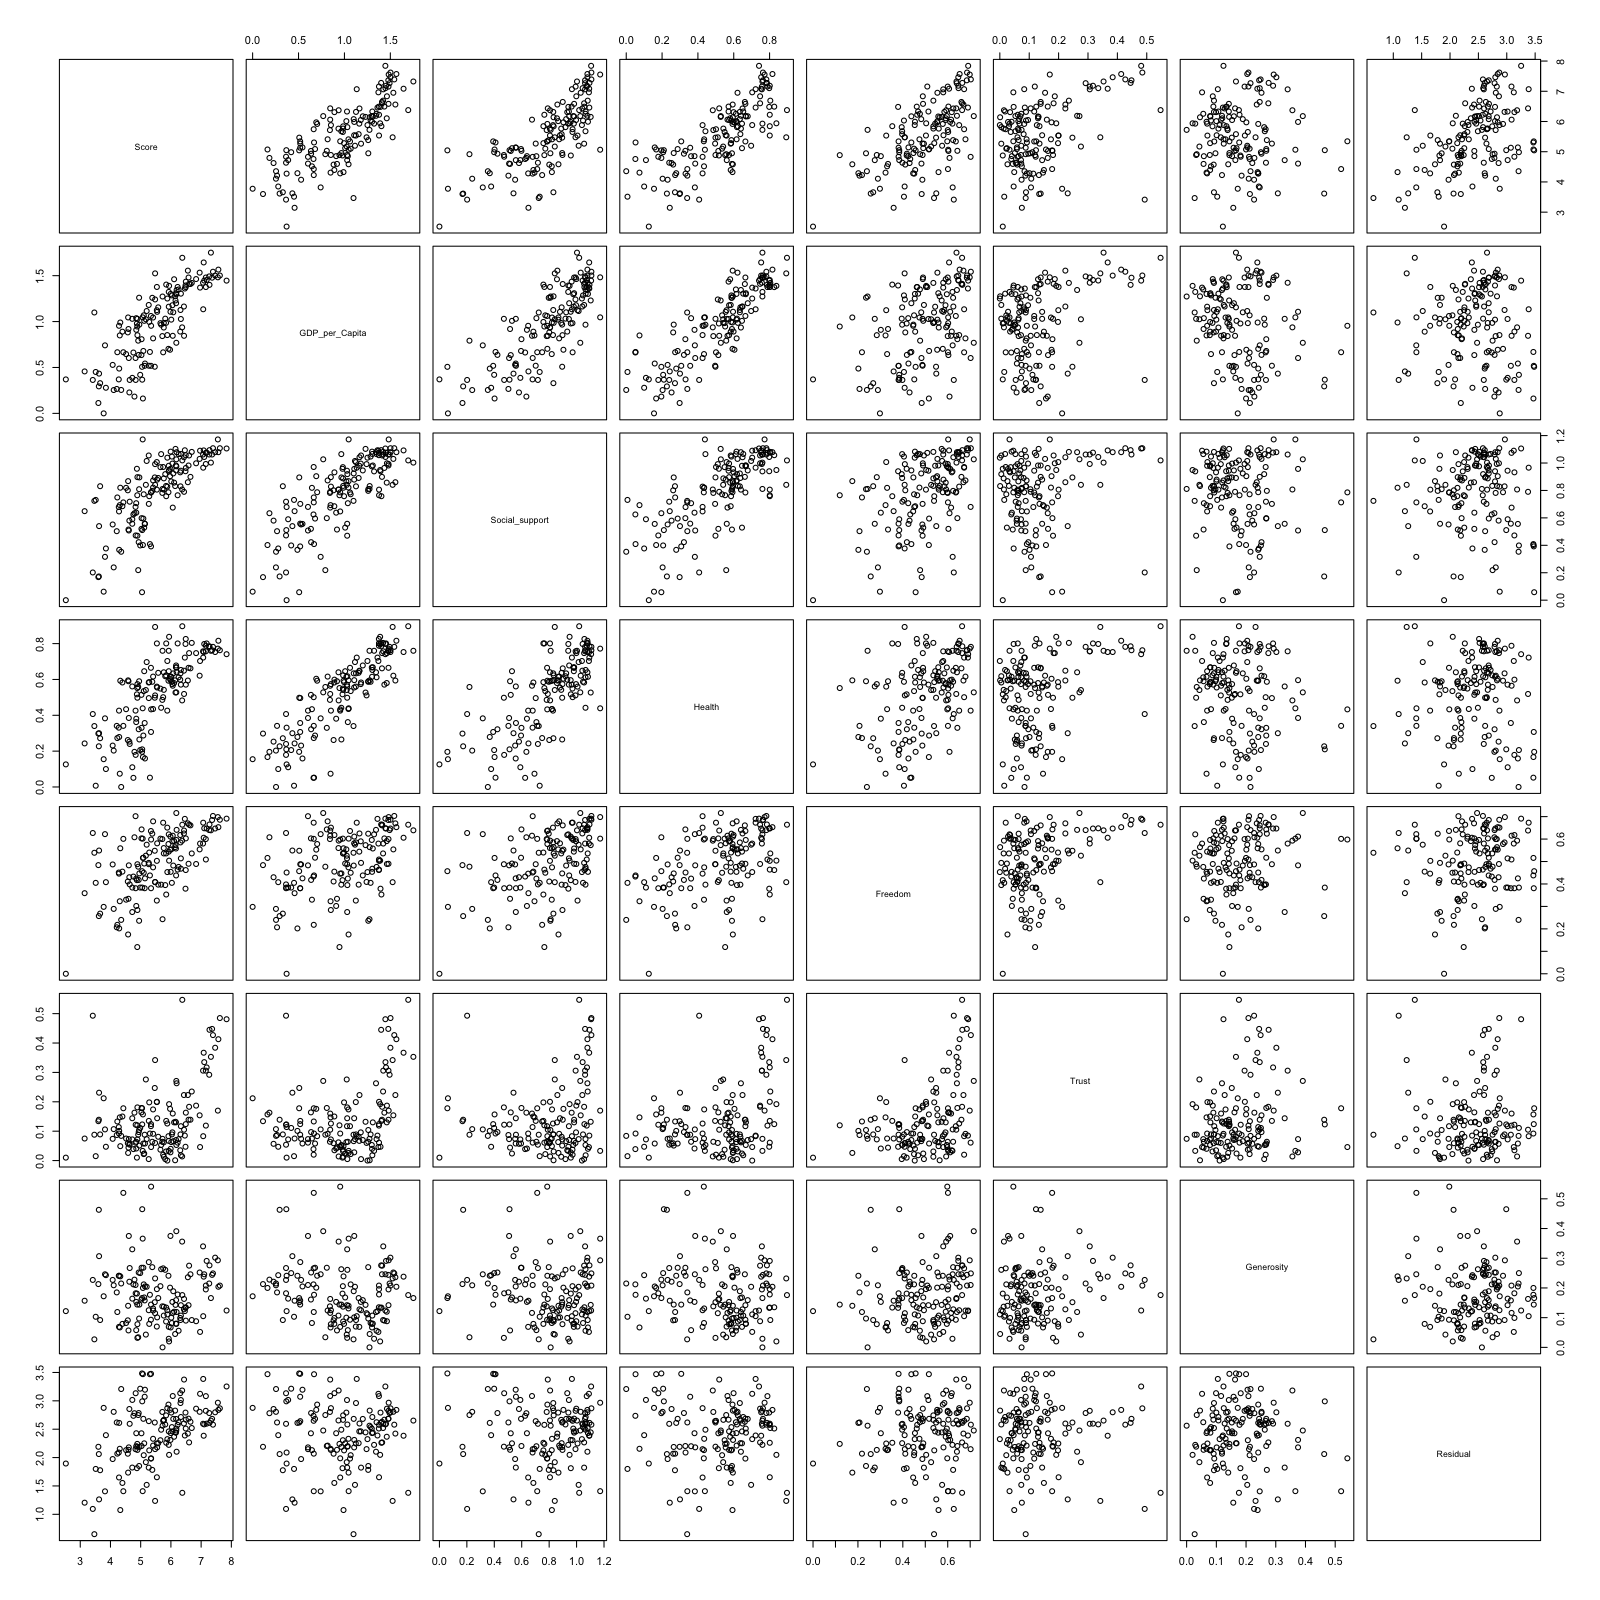

In [13]:
cor(data_21[,-c(1,2,3,11)])
plot(data_21[,-c(1,2,3,11)])

The correlation table shows the highest correlation between GDP_per_Capita and the happiness score, followed by Health and Social_support (> 0.7). Freedom shows a medium crorrelation and Trust a rather low correlation. Generosity show a very weak negative correlation.
These results are consistent with the visual analysis and support the assumption that Generosity ist not a good predictor for happiness in the year 2021. 

In a next step, I will fit two different linear models.

### Multiple linear regression
#### Model 1 with all the predictors


The downloaded binary packages are in
	/var/folders/vv/vsfn7tfx5bg_y1mqcbk1hg400000gn/T//RtmpY34B9n/downloaded_packages



Call:
lm(formula = Score ~ GDP_per_Capita + Social_support + Health + 
    Freedom + Trust + Generosity, data = data_21)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85066 -0.30017  0.05604  0.33297  1.04690 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.3264     0.1954  11.905  < 2e-16 ***
GDP_per_Capita   0.8002     0.2485   3.220 0.001591 ** 
Social_support   1.0983     0.2964   3.705 0.000302 ***
Health           0.9637     0.4232   2.277 0.024279 *  
Freedom          1.6521     0.4066   4.063 7.97e-05 ***
Trust            0.9477     0.4551   2.082 0.039118 *  
Generosity       0.5615     0.4925   1.140 0.256133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5417 on 142 degrees of freedom
Multiple R-squared:  0.7559,	Adjusted R-squared:  0.7456 
F-statistic: 73.29 on 6 and 142 DF,  p-value: < 2.2e-16


GDP_per_Capita Social_support         Health        Freedom          Trust 
      5.103236       2.969610       4.099477       1.585310       1.366464 
    Generosity 
      1.181310

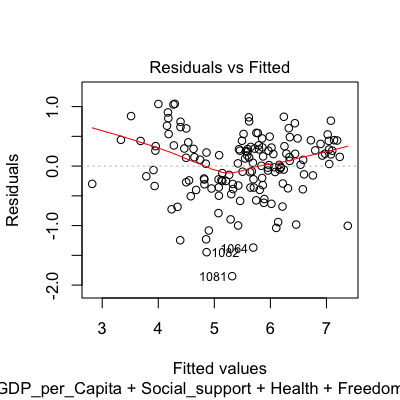

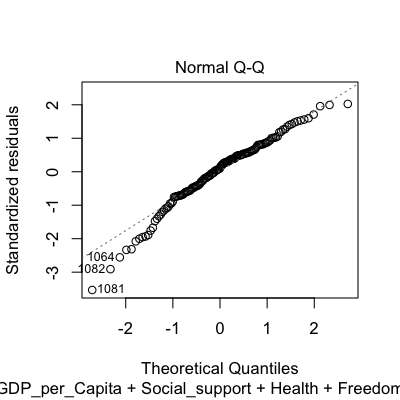

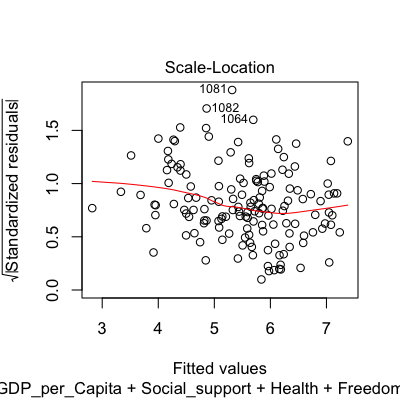

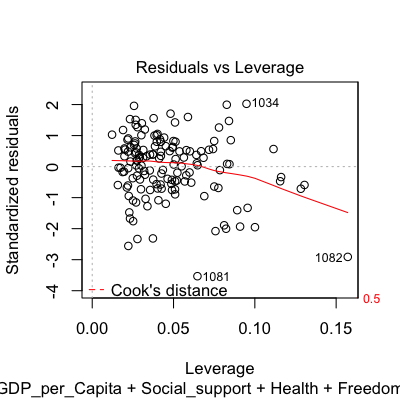

In [18]:
install.packages('regclass', quietly =TRUE)
library(regclass, quietly =TRUE)

lm1 <- lm(Score~GDP_per_Capita + Social_support + Health + Freedom + Trust + Generosity, data= data_21)
summary(lm1)

VIF(lm1)

options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)
plot(lm1)


The model 1 with all the predictors implies, if all predictor are 0 (no influence), the happiness score woud be 2.3264. In this model, Freedom has the greatest impact on the happiness score, if happiness is rated 1 unity higher, the happiness score increases significantly by 1.6521. Generosity does not have a significant impact on the happiness score.
The adjusted Rsquared in this model is 0.7456, this means 74.56 % of the variance in the happiness score is explained by this model.
According to the VIF (Variance inflation factor), there is multcolinearity between the variables, but it is in an acceptable range. 
The diagnostic plots for the linear regression anlysis show that the residuals show a slight non-linear pattern, the residuals are mostly normally distributed and evenly spread along the predictors.

#### Model 2: All the preditors except Generosity and Trust transformed to a quadratic factor


Call:
lm(formula = Score ~ GDP_per_Capita + Social_support + Health + 
    Freedom + Trust + Trust2, data = data_21)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94225 -0.33343  0.05942  0.36177  1.01951 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.2963     0.2042  11.243  < 2e-16 ***
GDP_per_Capita   0.7623     0.2453   3.107 0.002280 ** 
Social_support   1.1376     0.2968   3.833 0.000189 ***
Health           0.9280     0.4222   2.198 0.029568 *  
Freedom          1.7516     0.3966   4.416 1.98e-05 ***
Trust            2.4618     1.2560   1.960 0.051954 .  
Trust2          -3.1921     2.6480  -1.206 0.230012    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5414 on 142 degrees of freedom
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7459 
F-statistic: 73.39 on 6 and 142 DF,  p-value: < 2.2e-16


GDP_per_Capita Social_support         Health        Freedom          Trust 
      4.978561       2.980076       4.083769       1.510139      10.418003 
        Trust2 
     10.327514

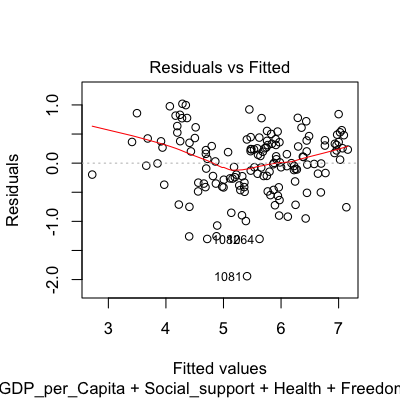

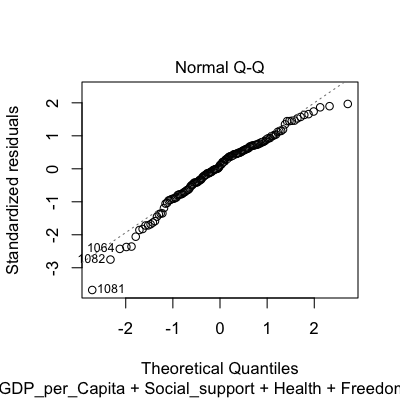

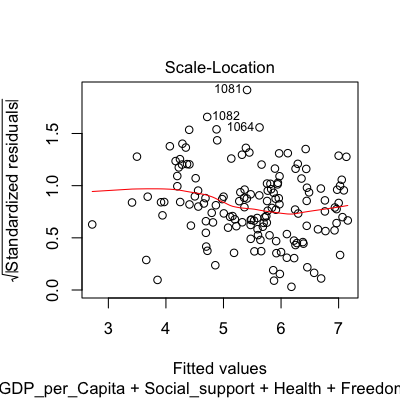

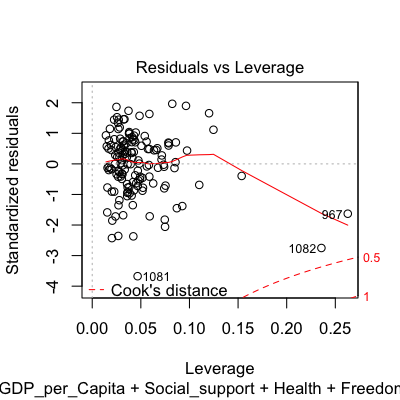

In [27]:
data_21$Trust2 <- data_21$Trust^2
lm2 <- lm(Score~GDP_per_Capita + Social_support + Health + Freedom + Trust + Trust2, data= data_21)
summary(lm2)
VIF(lm2)
plot(lm2)

The model 2 with all the predictors except Generosity and the transformed variable Trust implies, if all predictor are 0 (no influence), the happiness score would be 2.2963 . In this model, Freedom has aswell the greatest impact on the happiness score, if happiness is rated 1 unity higher, the happiness score increases significantly by 1.7516.
The adjusted Rsquared in this model is 0.7459, this means 74.59 % of the variance in the happiness score is explained by this model.
According to the VIF (Variance inflation factor) there is some multcolinearity between the variables, but it is an acceptable range except for Trust and Trust2.
The diagnostic plots are very similar to the ones of model 1.
The two model are very similar, whereat the model 2 explains slightly more of the variance in the happiness score.



### Model selection with AIC
In the last step the quality of the models are compared by the AIC and Crossvalidation.

In [33]:
AIC(lm1)
AIC(lm2)

[1] 248.9781

[1] 248.8188

According to the AIC model 2 is slightly better

### Model selection with cross-validation

In [32]:
library(caret, quietly = TRUE)

#Validation set approach
# Split the data into training and test set
set.seed(33)
training.samples <- data_2021$Score %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- data_2021[training.samples, ]
test.data <- data_2021[-training.samples, ]
# Build the model
model1 <- lm(Score~GDP_per_Capita + Social_support + Health + Freedom + Trust + Generosity, data= data_21)
# Make predictions and compute the R2, RMSE and MAE
predictions <- model1 %>% predict(test.data)
data.frame( R2 = R2(predictions, test.data$Score),
            RMSE = RMSE(predictions, test.data$Score),
            MAE = MAE(predictions, test.data$Score))


# Build the model

model2 <- lm(Score~GDP_per_Capita + Social_support + Health + Freedom + Trust + Trust^2, data= data_21)
# Make predictions and compute the R2, RMSE and MAE
predictions <- model2 %>% predict(test.data)
data.frame( R2 = R2(predictions, test.data$Score),
            RMSE = RMSE(predictions, test.data$Score),
            MAE = MAE(predictions, test.data$Score))

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.8585478,0.4373707,0.3568031


R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.856793,0.4392119,0.3628028


According to crossvalidation (Validation set approach) model 1 is slightly better, due to the lower RMSE (Root Mean Squared Error).

The measures of quality of the model vary very slightly. Due to the slightly lower RMSE in the Cross-Validation for the model 1 and the multicolinearity in the model 2, I would choose model 1, although there is probably not a big difference.

## 7. Conclusion

The data from the world happiness report 2015 - 2021 show similar patterns across the 7 years. According to the results from the analysis of variance, no significant difference between the years can be assumed. 
Across the regions the patterns vary a lot and overall a significant difference between regions can be assumed according to the analysis of variance. In detail, the majority of the regions differ significantly in the mean of the happiness score, some of the regions do not show a significant difference (e.g. North America and ANZ AND Western Europe). If the regions are ranked by the mean happiness score in the years 2015 - 2021, the people living in North America, Australia and New Zealand, rated themselves as the happiest people. The visual analysis and the statistical analysis are consistent regarding these results.

Concerning the predictors for the year 2021, the multiple linear model with all the predictors seems to be slightly a better fit than the model with all predictors except Generosity. However there seems to be a non-linear pattern that is not explained by this model. According to this model, the perception of freedom has the greatest impact on the happiness score followed by the perception of social support and health.

### References

Griffin, J. (2007). What do happiness studies study? Journal of Happiness Studies: An Interdisciplinary Forum on Subjective Well-Being, 8(1), 139–148. https://doi-org.ezproxy.uzh.ch/10.1007/s10902-006-9007-4

Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I). New York: Sustainable Development Solutions Network.

